# Pittsburgh Parking Meters by Neighborhood

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Import parking CSV file
# Dataset: Metered parking locations in Pittsburgh
parking = pd.read_csv("./parking_meters.csv")

# Import shape files for mapping
neighborhoods = gpd.read_file("../neighborhood/Neighborhoods_.shp")
parking_locs = gpd.read_file("./pghdb_sde_PPA_ParkingMeters.shp")

## An overlay of metered parking locations in Pittsburgh

<AxesSubplot:>

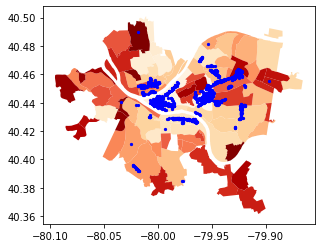

In [3]:
# Map all the parking locations over a map of Pittsburgh
pgh = neighborhoods.plot(cmap="OrRd")
parking_locs.plot(ax=pgh, color="blue", markersize=5)

## Number of metered parking locations grouped by neighborhood

In [4]:
# Count the number of metered parking locations in each neighborhood and sort descending
spots_per_neighborhood = parking.groupby("node").count().sort_values("fid", ascending=False)
# Rename for better readability
spots_per_neighborhood.rename(columns={'fid': 'count'}, inplace=True)
spots_per_neighborhood

,count,objectid,terminal_id,location,terminal_2,rate,latitude,longitude,x,y,...,terminal_3,rate_1,latitude_1,longitud_1,type,location_2,rates,enforcehou,enforeday,pm_zone
node,,,,,,,,,,,,,,,,,,,,,
Oakland,216,216,216,216,216,216,211,211,216,216,...,216,216,211,211,216,216,216,216,216,191
South Side,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,108
Downtown,104,104,104,104,104,104,102,102,104,104,...,104,104,99,99,104,104,104,104,104,95
NorthSide,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,83
Squirell Hill,69,69,69,69,69,69,68,68,69,69,...,69,69,68,68,69,69,69,69,69,68
ShadySide,66,66,66,66,66,66,65,65,66,66,...,66,66,65,65,66,66,5,5,5,63
Bloomfield,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,59
Uptown,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,55
East Liberty,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,55


## Top 10 neighborhoods with the most parking locations

In [5]:
# Select the top 10 neighborhoods with the most metered parking locations
top_10_by_count = spots_per_neighborhood.head(10)
top_10_by_count

,count,objectid,terminal_id,location,terminal_2,rate,latitude,longitude,x,y,...,terminal_3,rate_1,latitude_1,longitud_1,type,location_2,rates,enforcehou,enforeday,pm_zone
node,,,,,,,,,,,,,,,,,,,,,
Oakland,216,216,216,216,216,216,211,211,216,216,...,216,216,211,211,216,216,216,216,216,191
South Side,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,108
Downtown,104,104,104,104,104,104,102,102,104,104,...,104,104,99,99,104,104,104,104,104,95
NorthSide,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,83
Squirell Hill,69,69,69,69,69,69,68,68,69,69,...,69,69,68,68,69,69,69,69,69,68
ShadySide,66,66,66,66,66,66,65,65,66,66,...,66,66,65,65,66,66,5,5,5,63
Bloomfield,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,59
Uptown,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,55
East Liberty,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,55


## Parking locations ranked by cheapest price

In [6]:
# Rank each location based on lowest price
price_ranked = parking.sort_values("rates").dropna() # Drop NaN since some are missing data
price_ranked

,fid,objectid,terminal_id,location,node,terminal_2,rate,latitude,longitude,x,...,terminal_3,rate_1,latitude_1,longitud_1,type,location_2,rates,enforcehou,enforeday,pm_zone
308,309,354,406633-PENNAV4501,PENN AVE,Bloomfield,Active,"$1PH/4HRS/M-SAT,8AM-6PM",40.466255,-79.951213,-79.951202,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.466255,-79.951213,Street,Bloomfield,$1.00,8AM - 6PM,Mon - Sat,4535.0
813,814,901,421035-NCOMON0008,NORTH COMMONS,NorthSide,Active,"$1PH/4HRS/M-SAT,8AM-6PM",40.453649,-80.007298,-80.007301,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.453649,-80.007298,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5333.0
814,815,902,421036-NCOMON0006,NORTH COMMONS,NorthSide,Active,"$1PH/4HRS/M-SAT,8AM-6PM",40.453715,-80.006693,-80.006699,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.453715,-80.006693,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5333.0
815,816,903,421037-WCOMON0701,WEST COMMONS AVE,NorthSide,Active,"$1PH/4HRS/M-SAT,8AM-6PM",40.453047,-80.007809,-80.007797,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.453047,-80.007809,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5346.0
816,817,904,421038-RIDGE-0203,RIDGE AVE,NorthSide,Active,"$1PH/10HRS/M-SAT,8AM-6PM",40.451975,-80.009359,-80.009399,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.451975,-80.009359,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,122,136,402405-BLVDAL0201,BLVD OF ALLIES,Downtown,Active,"$4PH/2HRS/M-SAT,8AM-6PM",40.439086,-80.003447,-80.003403,...,Active,"$4PH/2HRS M-SAT,8AM-6PM",40.439086,-80.003447,Street,Downtown,$4.00,8AM - 6PM,Mon - Sat,4823.0
122,123,137,402406-BLVDAL0202,BLVD OF ALLIES,Downtown,Active,"$4PH/2HRS/M-SAT,8AM-6PM",40.438851,-80.003327,-80.003304,...,Active,"$4PH/2HRS M-SAT,8AM-6PM",40.438851,-80.003327,Street,Downtown,$4.00,8AM - 6PM,Mon - Sat,4824.0
123,124,138,402407-BLVDAL0203,BLVD OF ALLIES,Downtown,Active,"$4PH/2HRS/M-SAT,8AM-6PM",40.438696,-80.002455,-80.002502,...,Active,"$4PH/2HRS M-SAT,8AM-6PM",40.438696,-80.002455,Street,Downtown,$4.00,8AM - 6PM,Mon - Sat,4823.0
125,126,140,402409-BLVDAL0301,BLVD OF ALLIES,Downtown,Active,"$3PH/2HRS/M-SAT,8AM-6PM",40.438306,-80.001358,-80.001404,...,Active,"$4PH/2HRS M-SAT,8AM-6PM",40.438306,-80.001358,Street,Downtown,$4.00,8AM - 6PM,Mon - Sat,4825.0


## Top 10 ranked by cheapest price

In [7]:
# Select top 10 of the cheapest metered parking locations
top_10_by_price = price_ranked.head(10)
top_10_by_price

,fid,objectid,terminal_id,location,node,terminal_2,rate,latitude,longitude,x,...,terminal_3,rate_1,latitude_1,longitud_1,type,location_2,rates,enforcehou,enforeday,pm_zone
308,309,354,406633-PENNAV4501,PENN AVE,Bloomfield,Active,"$1PH/4HRS/M-SAT,8AM-6PM",40.466255,-79.951213,-79.951202,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.466255,-79.951213,Street,Bloomfield,$1.00,8AM - 6PM,Mon - Sat,4535.0
813,814,901,421035-NCOMON0008,NORTH COMMONS,NorthSide,Active,"$1PH/4HRS/M-SAT,8AM-6PM",40.453649,-80.007298,-80.007301,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.453649,-80.007298,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5333.0
814,815,902,421036-NCOMON0006,NORTH COMMONS,NorthSide,Active,"$1PH/4HRS/M-SAT,8AM-6PM",40.453715,-80.006693,-80.006699,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.453715,-80.006693,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5333.0
815,816,903,421037-WCOMON0701,WEST COMMONS AVE,NorthSide,Active,"$1PH/4HRS/M-SAT,8AM-6PM",40.453047,-80.007809,-80.007797,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.453047,-80.007809,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5346.0
816,817,904,421038-RIDGE-0203,RIDGE AVE,NorthSide,Active,"$1PH/10HRS/M-SAT,8AM-6PM",40.451975,-80.009359,-80.009399,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.451975,-80.009359,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5335.0
817,818,905,421039-RIDGE-0201,RIDGE AVE,NorthSide,Active,"$1PH/10HRS/M-SAT,8AM-6PM",40.452188,-80.008274,-80.008301,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.452188,-80.008274,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5335.0
818,819,906,421040-RIDGE-0601,RIDGE AVE,NorthSide,Active,"$1PH/10HRS/M-SAT,8AM-6PM",40.451010,-80.012021,-80.012001,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.451010,-80.012021,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5336.0
819,820,907,421041-RIDGE-0704,RIDGE AVE,NorthSide,Active,"$1PH/10HRS/M-SAT,8AM-6PM",40.450630,-80.012940,-80.012901,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.450630,-80.012940,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5337.0
820,821,908,421042-RIDGE-0702,RIDGE AVE,NorthSide,Active,"$1PH/10HRS/M-SAT,8AM-6PM",40.450741,-80.012338,-80.012299,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.450741,-80.012338,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5337.0
821,822,909,421043-RIDGE-0805,RIDGE AVE,NorthSide,Active,"$1PH/4HRS/M-SAT,8AM-6PM",40.450285,-80.015613,-80.015602,...,Active,"$1PH/10HRS M-Sat,8AM-10PM",40.450285,-80.015613,Street,North Side,$1.00,8AM - 6PM,Mon - Sat,5338.0


## Average price per neighborhood

In [8]:
# @param neighborhood = a dataframe containing only one neighborhood's info
# @returns average metered location price for given neighborhood
def calc_avg(neighborhood):
    sum = 0
    for rate in neighborhood:
        sum += float(str(rate).strip("$"))
    return sum / len(neighborhood)

# Replaces missing data with NaN to get dropped by dropna()
parking["node"].replace(' ', np.nan, inplace=True) 

# Call calc_avg on each neighborhood to calculate average meter cost in said neighborhood
avg_neighborhood_price = parking.groupby("node")["rates"].apply(calc_avg).dropna().sort_values().to_frame()
avg_neighborhood_price

,rates
node,
Allentown,1.000000
South Side,1.000000
NorthSide,1.000000
Lawrenceville,1.000000
Mt. Washingt*,1.000000
Brookline,1.000000
Bloomfield,1.000000
Beechview,1.000000
Carrick,1.000000


## Top 10 cheapest neighborhoods

In [9]:
# Select top 10 cheapest neighborhoods based on average cheapest meter price
top_10_cheapest_neighborhoods = avg_neighborhood_price.head(10)
top_10_cheapest_neighborhoods

,rates
node,
Allentown,1.0
South Side,1.0
NorthSide,1.0
Lawrenceville,1.0
Mt. Washingt*,1.0
Brookline,1.0
Bloomfield,1.0
Beechview,1.0
Carrick,1.0


## Cheapest neighborhoods with most metered locations

In [14]:
# Perform an inner join on top 10 average cheapest neighborhoods and top 10 neighborhoods with most parking locations
# This finds the overall best neighborhoods base on lowest average parking cost and most locations for parking
best_neighborhoods = top_10_cheapest_neighborhoods.join(other=top_10_by_count, how="inner", lsuffix="", rsuffix="_")

# Store/Export for use in group notebook
best_neighborhoods_parking = best_neighborhoods
%store best_neighborhoods_parking

# Display only the Neighborhood name, rate, and count (number of locations)
best_neighborhoods

Stored 'best_neighborhoods' (DataFrame)


,rates,count,objectid,terminal_id,location,terminal_2,rate,latitude,longitude,x,...,terminal_3,rate_1,latitude_1,longitud_1,type,location_2,rates_,enforcehou,enforeday,pm_zone
node,,,,,,,,,,,,,,,,,,,,,
South Side,1.0,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,108
NorthSide,1.0,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,83
Bloomfield,1.0,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,59


<AxesSubplot:title={'center':'Best neighborhood locations'}>

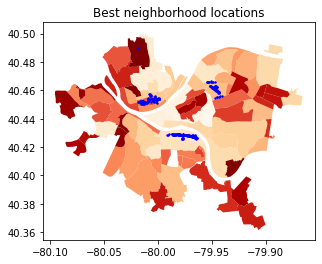

In [13]:
# Perform inner join to select the parking locations from the best neighborhoods
best_locs = parking_locs.join(other=best_neighborhoods, on="node", how="inner", lsuffix="_", rsuffix="__")

# Overlay the parking locations from the best neighborhoods on top of the Pittsburgh map
pgh = neighborhoods.plot(cmap="OrRd")
pgh.set_title("Best neighborhood locations")
best_locs.plot(ax=pgh, color="blue", legend=True, markersize=2)